In [37]:
import pandas as pd

# Load the CSV file
file_path = "house_price_predictor_final_1.csv"  # Use your uploaded file
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,Bedrooms,Bathrooms,Floor_no,Floor_in_sq_feet,Total_Price,Price_in_sq_feet,Area,Location
0,3,3,4,2350,50000000,21276,Gulshan,Gulshan_1
1,3,3,5,1765,37000000,20963,Gulshan,Gulshan_1
2,3,3,3,2700,55000000,20370,Gulshan,Gulshan_1
3,3,3,3,1960,39000000,19897,Gulshan,Gulshan_1
4,4,4,3,3200,58000000,18125,Gulshan,Gulshan_1


In [38]:
df.columns = df.columns.str.strip()
df.head()

,Bedrooms,Bathrooms,Floor_no,Floor_in_sq_feet,Total_Price,Price_in_sq_feet,Area,Location
0,3,3,4,2350,50000000,21276,Gulshan,Gulshan_1
1,3,3,5,1765,37000000,20963,Gulshan,Gulshan_1
2,3,3,3,2700,55000000,20370,Gulshan,Gulshan_1
3,3,3,3,1960,39000000,19897,Gulshan,Gulshan_1
4,4,4,3,3200,58000000,18125,Gulshan,Gulshan_1


In [39]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

Bedrooms            0
Bathrooms           0
Floor_no            0
Floor_in_sq_feet    0
Total_Price         0
Price_in_sq_feet    0
Area                0
Location            0
dtype: int64
Bedrooms             int64
Bathrooms            int64
Floor_no             int64
Floor_in_sq_feet     int64
Total_Price          int64
Price_in_sq_feet     int64
Area                object
Location            object
dtype: object


In [40]:
df.dropna(inplace=True)  # Remove rows with missing values
# OR
# df.fillna(df.mean(), inplace=True)  # Fill with mean values

In [41]:
df = pd.get_dummies(df, columns=['Area', 'Location'], drop_first=True)
df.head()

,Bedrooms,Bathrooms,Floor_no,Floor_in_sq_feet,Total_Price,Price_in_sq_feet,Area_Bashundhara,Area_Dhanmondi,Area_Gulshan,Area_Mirpur,...,Location_Uttara_Sector_11,Location_Uttara_Sector_12,Location_Uttara_Sector_13,Location_Uttara_Sector_15,Location_Uttara_Sector_3,Location_Uttara_Sector_4,Location_Uttara_Sector_5,Location_Uttara_Sector_6,Location_Uttara_Sector_7,Location_Uttara_Sector_9
0,3,3,4,2350,50000000,21276,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,3,3,5,1765,37000000,20963,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3,3,3,2700,55000000,20370,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,3,3,3,1960,39000000,19897,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,4,4,3,3200,58000000,18125,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


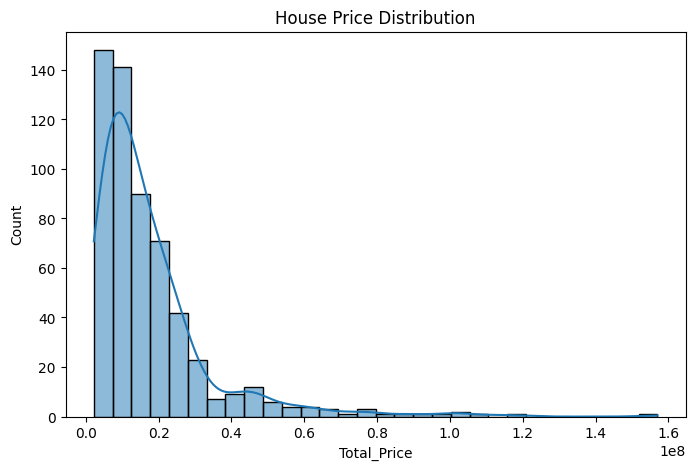

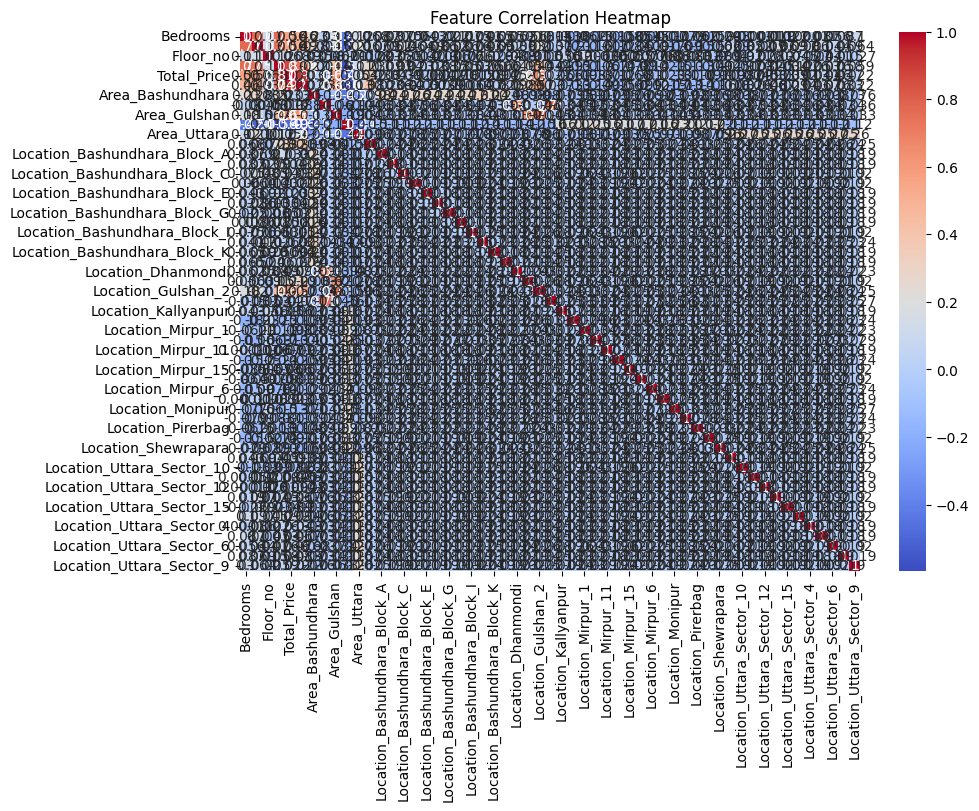

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Total_Price'], bins=30, kde=True)
plt.title("House Price Distribution")
plt.show()


# Correlation Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Total_Price', 'Price_in_sq_feet'])  # Features
y = df['Total_Price']  # Target variable

# Split the dataset (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")

Training Data: (458, 53), Testing Data: (115, 53)


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

best_model = None
best_r2 = -1

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    print(f"{name} - R² Score: {r2:.4f}")

    if r2 > best_r2:
        best_r2 = r2
        best_model = model

print(f"Best Model Selected: {best_model}")

Linear Regression - R² Score: 0.8393
Random Forest - R² Score: 0.9112
Best Model Selected: RandomForestRegressor(random_state=42)


In [59]:
# User Input Function
def predict_house_price():
    area_options = {
        "Banani": ["Banani"],
        "Bashundhara": [f"Bashundhara_Block_{ch}" for ch in "ABCDEFGHIJKL"],
        "Dhanmondi": ["Dhanmondi", "Kalabagan"],
        "Gulshan": ["Gulshan_1", "Gulshan_2"],
        "Mirpur": ["Ahmed_Nagar", "Kallyanpur", "Kazi_Para", "Mirpur_DOHS", "Monipur",
                   "Pallabi", "Pirerbag", "Rupnagar_R_A", "Mirpur_1", "Mirpur_2", 
                   "Mirpur_6", "Mirpur_10", "Mirpur_11", "Mirpur_12", "Mirpur_15", "Shewrapara"],
        "Uttara": [f"Uttara_Sector_{i}" for i in [1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15]]
    }

    area = input(f"Select Area: {list(area_options.keys())}: ")
    if area not in area_options:
        print("Invalid Area!")
        return

    location = input(f"Select Location: {area_options[area]}: ")
    if location not in area_options[area]:
        print("Invalid Location!")
        return

    bedrooms = int(input("Enter number of Bedrooms (2-5): "))
    bathrooms = int(input("Enter number of Bathrooms (2-5): "))
    floor_no = int(input("Enter Floor No (1-9): "))
    floor_sq_feet = int(input("Enter Floor Area in Square Feet: "))

    # Create DataFrame for Prediction
    input_data = pd.DataFrame([[bedrooms, bathrooms, floor_no, floor_sq_feet]], 
                              columns=['Bedrooms', 'Bathrooms', 'Floor_no', 'Floor_in_sq_feet'])

    # Add dummy variables for Area & Location
    for col in X.columns:
        if col.startswith("Area_") or col.startswith("Location_"):
            input_data[col] = 0
    input_data[f"Area_{area}"] = 1
    input_data[f"Location_{location}"] = 1

    # Ensure input columns match training data
    input_data = input_data.reindex(columns=X.columns, fill_value=0)

    # Predict Price
    predicted_price = best_model.predict(input_data)[0]
    price_per_sqft = predicted_price / floor_sq_feet

    print(f"\nPredicted House Price: {predicted_price:,.2f} BDT")
    print(f"Price per Square Feet: {price_per_sqft:,.2f} BDT")

# Run Prediction
predict_house_price()

Select Area: ['Banani', 'Bashundhara', 'Dhanmondi', 'Gulshan', 'Mirpur', 'Uttara']:  Banani
Select Location: ['Banani']:  Banani
Enter number of Bedrooms (2-5):  3
Enter number of Bathrooms (2-5):  3
Enter Floor No (1-9):  5
Enter Floor Area in Square Feet:  1600



Predicted House Price: 19,636,000.00 BDT
Price per Square Feet: 12,272.50 BDT


In [48]:
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Final Model Accuracy (R² Score): {r2:.4f}")

Final Model Accuracy (R² Score): 0.9112
